# Linear Congruential Generator

In [2]:
class LCG:
    def __init__(self, seed=42, a=1664525, c=1013904223, m=2**32):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        """Generate the next random integer."""
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

    def random(self):
        """Generate a random float in [0,1)."""
        return self.next() / self.m

This will give us numbers with uniform distribution b/w 0 and 1. Now to generate a random value with our desired distribution we can find the inverse of their cumulative distributive function. We can approximate this inverse for a normal distribution using Beasley-Springer-Moro Approximation

In [3]:
import math
import numpy as np

# Coefficients for Beasley-Springer-Moro Approximation
A = [2.50662823884, -18.61500062529, 41.39119773534, -25.44106049637]
B = [-8.47351093090, 23.08336743743, -21.06224101826, 3.13082909833]
C = [0.337475482272615, 0.976169019091719, 0.160797971491821,
     0.027643881033386, 0.003840572937360, 0.000395189651191,
     0.000032176788176, 0.000000288816736, 0.000000396031518]

def normal_inverse_cdf(u, mean=0, std_dev=1):
    """Approximate the inverse CDF of a normal distribution."""
    if u <= 0 or u >= 1:
        raise ValueError("Input must be in (0,1)")

    y = u - 0.5
    if abs(y) < 0.42:
        r = y * y
        num = sum(A[i] * r**i for i in range(4))
        denom = 1 + sum(B[i] * r**(i + 1) for i in range(3))
        z = y * num / denom
    else:
        r = u if y > 0 else 1 - u
        s = math.log(-math.log(r))
        z = sum(C[i] * s**i for i in range(9))
        if y < 0:
            z = -z

    return mean + std_dev * z

# Generating a Dataset of 1000 samples

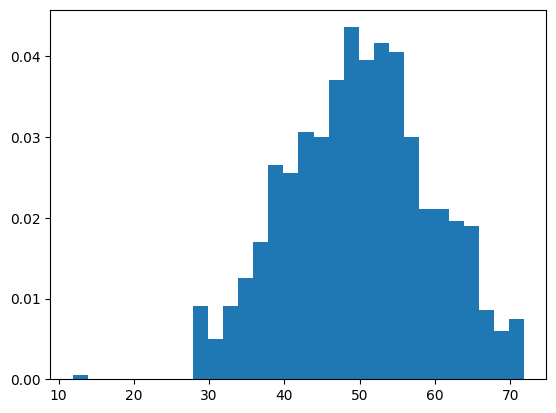

49.977010463140395
9.509729396289972


In [ ]:
samples = []
lcg = LCG(1234321)
for i in range (1000):
    samples.append(normal_inverse_cdf(lcg.random(),mean=50,std_dev=10))

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(samples, bins=30, density=True)
plt.show()


# MLE

In [35]:
def compute_mean(samples):
    return sum(samples)/len(samples)

def compute_standard_deviation(samples):
    return math.sqrt(sum((x - mean(samples))**2 for x in samples)/(len(samples)-1))

In [37]:
compute_mean(samples), compute_standard_deviation(samples)

(49.977010463140395, 9.514487830111033)

## Overlay Histogram

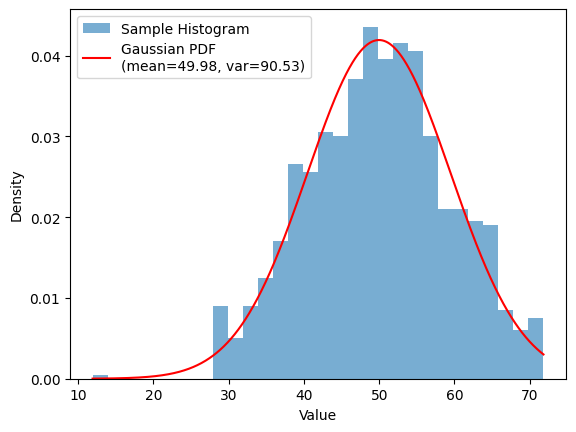

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_val = compute_mean(samples)
std_val = compute_standard_deviation(samples)

# Define a range for the x-axis for plotting the Gaussian curve
x = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = norm.pdf(x, loc=mean_val, scale=std_val)

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Sample Histogram')

# Overlay the Gaussian PDF (note: using std_val**2 for variance if desired)
plt.plot(x, pdf, 'r-', label=f'Gaussian PDF\n(mean={mean_val:.2f}, var={(std_val**2):.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Skewing distibution by adding samples

In [41]:
for i in range(50):
    samples.append(100+(50*lcg.random()))

In [42]:
compute_mean(samples), compute_standard_deviation(samples)

(56.73416970626574, 23.626031366451002)

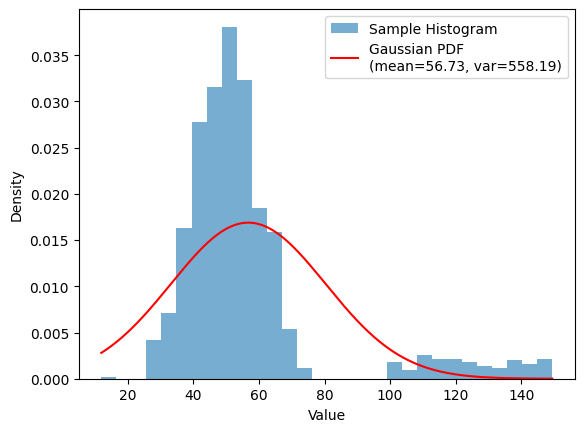

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_val = compute_mean(samples)
std_val = compute_standard_deviation(samples)

# Define a range for the x-axis for plotting the Gaussian curve
x = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = norm.pdf(x, loc=mean_val, scale=std_val)

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Sample Histogram')

# Overlay the Gaussian PDF (note: using std_val**2 for variance if desired)
plt.plot(x, pdf, 'r-', label=f'Gaussian PDF\n(mean={mean_val:.2f}, var={(std_val**2):.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Impact of the skewing

- Mean shifts towards the outliers
- Standard Deviation is doubled in this case

## Ways of removing Outliers

Using Z-score methods we can remove the affect of outliers:- 
We measure how many standard deviations from the mean point a data point is. If its above a certain z-score we consider a point an outlier
